<a href="https://colab.research.google.com/github/eskutza/AnalisisPredictivo/blob/main/colab/clustering_01_tarea_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

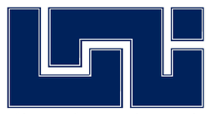

</center>

<h1><b>
Dirección de Estudios de Posgrado y Educación Continua
<h2><b>
Analítica Predictiva y Machine Learning con R, Python y Databricks

[UNI-DEPEC](https://posgrado.uni.edu.ni)

~~~Python
Iranzuegi López, Luis Ángel
~~~

# **Tarea Modelo no Supervisado**

# **Clustering:** <font color="#0A66C2"><h10>**PyCaret** <font> 



# **Carga de librerías necesarias**

## <font color="#333F49"> **Para el análisis de datos y el conjunto de datos** <font>

In [ ]:
import pandas as pd
import numpy as np

## <font color="#333F49"> **Para el preprocesado y el modelo** <font>

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


## <font color="#333F49"> **Para gráficos** <font>

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import altair as alt
import seaborn as sns

## <font color="#333F49">**Para serializar: grabar y recuperar los modelos entrenados** <font>

In [ ]:
import pickle 
import os

## <font color="#333F49">**Para las alertas** <font>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# **Análisis Exploratorio de los Datos y Preprocesamiento de Datos**

## <font color="#333F49">**Descripción del set de datos** <font>

El set de datos hace referencia a distintos indicadores de negocio de una cadena de supermercados en una serie de ciudades.

El set de datos, en una primera lectura, viene delimitado, definido por **dos ejes** que no podemos obviar. 

Por un lado, el **eje del tiempo**. En concreto, los datos,observaciones nos situán en los tres primeros meses de 2019.

Y, por otro lado, el **eje cultural** de un país como es Myanmar o Birmania, es decir, nos referimos a los usos, costumbres, valores de esa sociedad y que deben ser tenidos en cuenta en este proceso explotario de los Datos y también en los siguientes pasos y consideraciones de negocio que se extraigan.

[kaggle, ventas supermercados]( https://www.kaggle.com/aungpyaeap/supermarket-sales)

**Objetivo:** 

Definir un modelo que permita detectar patrones, grupos en función de las observaciones recogidas. De este modo, contar con segmentación de los y las clientas de esta cadena de supermercados que pueda ayudarnos en la implementación de campañas u otras acciones que se estimen de interés para la actividad diaria.

**En este análisis nos vamos a centrar en variables que describan hábitos de consumo y aquellas de carácter sociológico que nos permitan realziar una primera aproximación a segmentos de clientes**

El dataframe original contiene 17 variables y 1000 observaciones.

Tras realizar un Ánalisis Exploratorio de los Datos (EDA) del mismo, resulta un dataframe con 20 variables y 1000 observaciones.


[Análisis Explotarorio de los datos](https://github.com/eskutza/AnalisisPredictivo/blob/main/colab/eda_tarea_02.ipynb)

Las variables se definen como:

- **Identificación de la factura:** Número de identificación de la factura del comprobante de venta generado por computadora
- **Ciudad:** Ubicación de los supermercados
- **Tipo_cliente:** Tipo de clientes,clientas registradas como: miembros para clientes, clientas que usan tarjeta de miembro ;y, normal para clientes, clientas sin tarjeta de miembro
- **Género:** Género tipo de cliente, clienta
- **Línea_producto:** Categorías de productos generales: accesorios electrónicos, accesorios de moda, alimentos y bebidas, salud y belleza, hogar y estilo de vida, deportes y viajes
- **Precio_unitario:** Precio de cada producto en $
- **Cantidad:** Número de productos comprados por cliente, clienta
- **Impuesto:** Tasa de impuesto del 5% por compra del cliente, clienta
- **Total:** Precio total abonado por los y las clientas con impuestos incluidos
- **Forma_pago:** Pago utilizado por el cliente para la compra (hay 3 métodos disponibles: efectivo, tarjeta de crédito y billetera electrónica)
- **Coste:** Costo de los bienes vendidos
- **Calificación:** Calificación de estratificación del cliente en su experiencia de compra general (en una escala del 1 al 10) 
- **Fecha2:** Fecha de compra (Registro disponible desde enero de 2019 hasta marzo de 2019)
- **Dia:** Día de compra 
- **Jornada:** Se categorizan los días como laborales y  festivos, atendiendo a la jornada laboral de Myanmar, dia de la semana y las fiestas nacionales en estos tres primeros meses del año
- **Horario:** Se categorizan los actos de compra según el horario donde se han realziado. De mañana (hasta las 13:59), tarde (de 14:00 a las 17:59, tomando como referencia que el horario comercial marca el cierre a las 18:00) y noche (de 18:00 a 21:00). 
- **Calificacion2:** Se categorizan los y las clientas según sea su vinculación, satisfacción con los supermercados objeto de estudio. Detractores cuando valoran su experiencia de compra conuna puntuación inferior a 6.5; Neutros cuando la valoración de dicha experiencia se mueve en un rango de 6.5 a 8.5; y, Promotores cuando su valoración de la experiencia de compra ha sido muy satisfactoria
- **ISG:** el **Indicador de Satisfacción General** nos transforma la categorización de la experiencia de compra en un indicador, una puntuación de los supermercados. Así, otorgaremos un valor de -100 a quienes hayamos calificado como Detractores; un valor de 0 a quines manifiesten una Calificación Neutra; y, una puntuación de 100 a quienes se hallen muy satisfechos con nuestros supermercados. **El rango de este indicador se moverá de -100 (cuando todas las valoraciones sean inferiores a 6.5) a 100 (cuando todas las valoraciones sean superiores a 8.5)**
- **Anomaly:** Si la observación es categorizada o no como outlier (según modelo iforest, 0.05, implementado con PyCaret)
- **Anomaly_Score:** Score que devuelve el modelo implementado al categorizar cada observación como outlier o no (modelo iforest, 0.05, implementado con PyCaret)

In [ ]:
url = 'https://raw.githubusercontent.com/eskutza/AnalisisPredictivo/main/Datasets/Anomaly_tarea_02.csv'

In [ ]:
df = pd.read_csv(url)
df.drop(columns='Unnamed: 0', inplace=True)
df

,Factura,Ciudad,Tipo_cliente,Genero,Linea_producto,Precio_unidad,Cantidad,Impuesto,Total,Forma_pago,Coste,Calificacion,Fecha2,Dia,Jornada,Horario,Calificacion2,ISG,Anomaly,Anomaly_Score
0,750-67-8428,Yangon,Miembro,Mujer,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,9.1,2019-01-05,Saturday,Laboral,Mañana,Promotores,100,0,-0.014667
1,226-31-3081,Naypyitaw,Normal,Mujer,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,9.6,2019-03-08,Friday,Laboral,Mañana,Promotores,100,0,-0.032525
2,631-41-3108,Yangon,Normal,Hombre,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,7.4,2019-03-03,Sunday,Festivo,Mañana,Neutros,0,0,-0.038840
3,123-19-1176,Yangon,Miembro,Hombre,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,8.4,2019-01-27,Sunday,Festivo,Noche,Neutros,0,0,-0.021886
4,373-73-7910,Yangon,Normal,Hombre,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,5.3,2019-02-08,Friday,Laboral,Mañana,Detractores,-100,0,-0.022366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Naypyitaw,Normal,Hombre,Health and beauty,40.35,1,2.0175,42.3675,Ewallet,40.35,6.2,2019-01-29,Tuesday,Laboral,Mañana,Detractores,-100,0,-0.014791
996,303-96-2227,Mandalay,Normal,Mujer,Home and lifestyle,97.38,10,48.6900,1022.4900,Ewallet,973.80,4.4,2019-03-02,Saturday,Festivo,Tarde,Detractores,-100,1,0.014024
997,727-02-1313,Yangon,Miembro,Hombre,Food and beverages,31.84,1,1.5920,33.4320,Cash,31.84,7.7,2019-02-09,Saturday,Laboral,Mañana,Neutros,0,0,-0.020998
998,347-56-2442,Yangon,Normal,Hombre,Home and lifestyle,65.82,1,3.2910,69.1110,Cash,65.82,4.1,2019-02-22,Friday,Laboral,Tarde,Detractores,-100,0,-0.006976


In [ ]:
df.index

RangeIndex(start=0, stop=1000, step=1)

In [ ]:
df.shape

(1000, 20)

In [ ]:
df.size

20000

**Dividimos el set de datos** en un dataframe con datos para definir el modelo y otro dataframe con datos que el modelo no ha visto, para trabajar con ellos posteriormente, una vez definido el modelo.

In [ ]:
datos = df.sample(frac=0.90, random_state=123)
datos_no_vistos = df.drop(datos.index)

In [ ]:
datos.reset_index(inplace=True, drop=True)
datos_no_vistos.reset_index(inplace=True, drop=True)

In [ ]:
print("Datos para Modelar: " + str(datos.shape))
print("Datos no vistos para Predicciones: " + str(datos_no_vistos.shape))

Datos para Modelar: (900, 20)
Datos no vistos para Predicciones: (100, 20)


In [ ]:
datos.head()

,Factura,Ciudad,Tipo_cliente,Genero,Linea_producto,Precio_unidad,Cantidad,Impuesto,Total,Forma_pago,Coste,Calificacion,Fecha2,Dia,Jornada,Horario,Calificacion2,ISG,Anomaly,Anomaly_Score
0,802-70-5316,Yangon,Miembro,Mujer,Sports and travel,92.13,6,27.639,580.419,Cash,552.78,8.3,2019-03-06,Wednesday,Laboral,Noche,Neutros,0,0,-0.009627
1,875-46-5808,Mandalay,Miembro,Hombre,Health and beauty,25.90,10,12.950,271.950,Ewallet,259.00,8.7,2019-02-06,Wednesday,Laboral,Tarde,Promotores,100,0,-0.012638
2,326-78-5178,Naypyitaw,Miembro,Hombre,Food and beverages,91.40,7,31.990,671.790,Cash,639.80,9.5,2019-02-03,Sunday,Festivo,Mañana,Promotores,100,0,-0.015569
3,127-47-6963,Yangon,Normal,Hombre,Health and beauty,51.71,4,10.342,217.182,Credit card,206.84,9.8,2019-03-09,Saturday,Laboral,Mañana,Promotores,100,0,-0.022262
4,241-72-9525,Mandalay,Normal,Hombre,Sports and travel,51.91,10,25.955,545.055,Cash,519.10,8.2,2019-02-16,Saturday,Laboral,Mañana,Neutros,0,0,-0.008961


In [ ]:
datos_no_vistos.head()

,Factura,Ciudad,Tipo_cliente,Genero,Linea_producto,Precio_unidad,Cantidad,Impuesto,Total,Forma_pago,Coste,Calificacion,Fecha2,Dia,Jornada,Horario,Calificacion2,ISG,Anomaly,Anomaly_Score
0,631-41-3108,Yangon,Normal,Hombre,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,7.4,2019-03-03,Sunday,Festivo,Mañana,Neutros,0,0,-0.038840
1,765-26-6951,Yangon,Normal,Hombre,Sports and travel,72.61,6,21.7830,457.4430,Credit card,435.66,6.9,2019-01-01,Tuesday,Laboral,Mañana,Neutros,0,0,-0.022299
2,777-82-7220,Mandalay,Miembro,Hombre,Home and lifestyle,30.12,8,12.0480,253.0080,Cash,240.96,7.7,2019-03-03,Sunday,Festivo,Mañana,Neutros,0,0,-0.029446
3,727-46-3608,Mandalay,Miembro,Mujer,Food and beverages,20.01,9,9.0045,189.0945,Ewallet,180.09,4.1,2019-02-06,Wednesday,Laboral,Tarde,Detractores,-100,0,-0.026408
4,162-48-8011,Yangon,Miembro,Mujer,Food and beverages,44.59,5,11.1475,234.0975,Cash,222.95,8.5,2019-02-10,Sunday,Festivo,Tarde,Promotores,100,0,-0.032561


# **Definición del modelo de clustering:** <font color="#0A66C2"><h10>**buscando un perfil en relación con los hábitos de compra** <font> 

Se han realizado más de una veintena de pruebas en la definición de la configuración y creación de este modelo, buscando la alternativa que nos reportase un valor de Sihoulette más alto y una valor en número de clústers ajustado a la capacidad de gestión del departamento de marketing de la cadena de supermercados.

## <font color="#333F49"> **Configuración del entorno** <font>

In [ ]:
from pycaret.clustering import *

In [ ]:
cluster = setup(data = datos,
          session_id = 123,
          ignore_features = ['Factura','Fecha2', 'Calificacion', 'Precio_unidad', 'Coste', 'Impuesto', 'Cantidad', 'Total','Calificacion2', 'ISG', 'Anomaly', 'Anomaly_Score','Forma_pago', 'Linea_producto','Jornada','Ciudad','Tipo_cliente'],
          categorical_features =['Genero','Horario', 'Dia'],
          normalize = True,
          normalize_method = 'zscore',
          remove_multicollinearity = True, 
          multicollinearity_threshold = 0.75,
          remove_perfect_collinearity = True)

,Description,Value
0,session_id,123
1,Original Data,"(900, 20)"
2,Missing Values,False
3,Numeric Features,0
4,Categorical Features,3
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(900, 11)"
9,CPU Jobs,-1


In [ ]:
get_config('X').columns

Index(['Genero_Hombre', 'Dia_Friday', 'Dia_Monday', 'Dia_Saturday',
       'Dia_Sunday', 'Dia_Thursday', 'Dia_Tuesday', 'Dia_Wednesday',
       'Horario_Mañana', 'Horario_Noche', 'Horario_Tarde'],
      dtype='object')

## <font color="#333F49"> **Análisis comparado de los modelos** <font>

Al seleccionar solo **variables categóricas** para el análisis, el método de 
<font color="#0A66C2"><h10>**kmodes es el más apropido.** <font> 



El objetivo es definir un modelo que permita detectar patrones, grupos en función de las observaciones recogidas. De este modo, contar con segmentación de los y las clientas de nuestra cadena de supermercados que pueda ayudarnos en la implementación de campañas u otras acciones que se estimen de interés para la actividad diaria.

In [ ]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


## <font color="#333F49"> **Creación del modelo** <font>

In [ ]:
kmodes = create_model('kmodes', num_clusters=3)
print(kmodes)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.301,270.6287,1.48,0,0,0


KModes(cat_dissim=<function matching_dissim at 0x7fd6c3121290>, init='Cao',
       max_iter=100, n_clusters=3, n_init=1, n_jobs=-1, random_state=123,
       verbose=0)


## <font color="#333F49"> **Asignar el modelo** <font>

In [ ]:
kmodes_resultados = assign_model(kmodes)
kmodes_resultados.head()

,Factura,Ciudad,Tipo_cliente,Genero,Linea_producto,Precio_unidad,Cantidad,Impuesto,Total,Forma_pago,Coste,Calificacion,Fecha2,Dia,Jornada,Horario,Calificacion2,ISG,Anomaly,Anomaly_Score,Cluster
0,802-70-5316,Yangon,Miembro,Mujer,Sports and travel,92.13,6,27.639,580.419,Cash,552.78,8.3,2019-03-06,Wednesday,Laboral,Noche,Neutros,0,0,-0.009627,Cluster 2
1,875-46-5808,Mandalay,Miembro,Hombre,Health and beauty,25.90,10,12.950,271.950,Ewallet,259.00,8.7,2019-02-06,Wednesday,Laboral,Tarde,Promotores,100,0,-0.012638,Cluster 1
2,326-78-5178,Naypyitaw,Miembro,Hombre,Food and beverages,91.40,7,31.990,671.790,Cash,639.80,9.5,2019-02-03,Sunday,Festivo,Mañana,Promotores,100,0,-0.015569,Cluster 0
3,127-47-6963,Yangon,Normal,Hombre,Health and beauty,51.71,4,10.342,217.182,Credit card,206.84,9.8,2019-03-09,Saturday,Laboral,Mañana,Promotores,100,0,-0.022262,Cluster 0
4,241-72-9525,Mandalay,Normal,Hombre,Sports and travel,51.91,10,25.955,545.055,Cash,519.10,8.2,2019-02-16,Saturday,Laboral,Mañana,Neutros,0,0,-0.008961,Cluster 0


In [ ]:
kmodes_resultados.shape

(900, 21)

In [ ]:
from google.colab import files
kmodes_resultados.to_csv('cluster_01_modelo_tarea_02.csv') 
files.download('cluster_01_modelo_tarea_02.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## <font color="#333F49"> **Visualización del modelo** <font>

### Visualización de los clusters

In [ ]:
plot_model(kmodes)

### Visualización del <font color="#0A66C2"><h10>**Codo.** <font> 


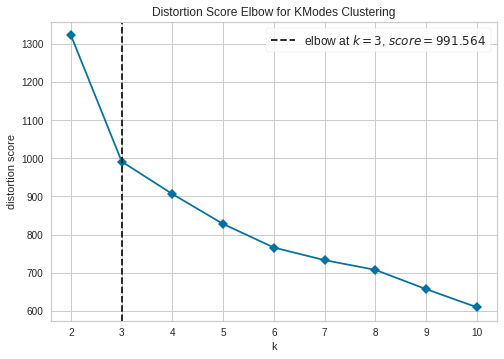

In [ ]:
plot_model(kmodes, plot='elbow')

### Visualización de  <font color="#0A66C2"><h10>**Silhouette.** <font> 

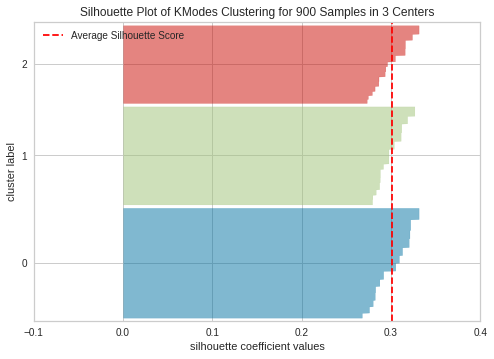

In [ ]:
plot_model(kmodes, plot='silhouette')

## <font color="#333F49"> **Guardar el modelo** <font>

In [ ]:
save_model(kmodes,'/content/cluster_01_modelo_tarea_02_pred')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['Genero', 'Horario',
                                                             'Dia'],
                                       display_types=True,
                                       features_todrop=['Factura', 'Fecha2',
                                                        'Calificacion',
                                                        'Precio_unidad', 'Coste',
                                                        'Impuesto', 'Cantidad',
                                                        'Total', 'Calificacion2',
                                                        'ISG', 'Anomaly',
                                                        'Anomaly_Score',
                                                        'Forma_pago',
                                                        'Linea_producto',
                                                       

In [ ]:
from google.colab import files
files.download('cluster_01_modelo_tarea_02_pred.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## <font color="#333F49"> **Acceder al modelo guardado** <font>

In [ ]:
saved_model = load_model('/content/cluster_01_modelo_tarea_02_pred')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
nueva_prediccion = predict_model(saved_model, data=datos_no_vistos)
nueva_prediccion

,Factura,Ciudad,Tipo_cliente,Genero,Linea_producto,Precio_unidad,Cantidad,Impuesto,Total,Forma_pago,Coste,Calificacion,Fecha2,Dia,Jornada,Horario,Calificacion2,ISG,Anomaly,Anomaly_Score,Cluster
0,631-41-3108,Yangon,Normal,Hombre,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,7.4,2019-03-03,Sunday,Festivo,Mañana,Neutros,0,0,-0.038840,Cluster 0
1,765-26-6951,Yangon,Normal,Hombre,Sports and travel,72.61,6,21.7830,457.4430,Credit card,435.66,6.9,2019-01-01,Tuesday,Laboral,Mañana,Neutros,0,0,-0.022299,Cluster 0
2,777-82-7220,Mandalay,Miembro,Hombre,Home and lifestyle,30.12,8,12.0480,253.0080,Cash,240.96,7.7,2019-03-03,Sunday,Festivo,Mañana,Neutros,0,0,-0.029446,Cluster 0
3,727-46-3608,Mandalay,Miembro,Mujer,Food and beverages,20.01,9,9.0045,189.0945,Ewallet,180.09,4.1,2019-02-06,Wednesday,Laboral,Tarde,Detractores,-100,0,-0.026408,Cluster 1
4,162-48-8011,Yangon,Miembro,Mujer,Food and beverages,44.59,5,11.1475,234.0975,Cash,222.95,8.5,2019-02-10,Sunday,Festivo,Tarde,Promotores,100,0,-0.032561,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,430-02-3888,Mandalay,Normal,Hombre,Electronic accessories,46.02,6,13.8060,289.9260,Cash,276.12,7.1,2019-02-07,Thursday,Laboral,Tarde,Neutros,0,0,-0.037143,Cluster 1
96,267-62-7380,Naypyitaw,Miembro,Hombre,Electronic accessories,82.34,10,41.1700,864.5700,Ewallet,823.40,4.3,2019-03-29,Friday,Laboral,Noche,Detractores,-100,0,-0.003680,Cluster 2
97,886-18-2897,Yangon,Normal,Mujer,Food and beverages,56.56,5,14.1400,296.9400,Credit card,282.80,4.5,2019-03-22,Friday,Laboral,Noche,Detractores,-100,0,-0.034201,Cluster 2
98,303-96-2227,Mandalay,Normal,Mujer,Home and lifestyle,97.38,10,48.6900,1022.4900,Ewallet,973.80,4.4,2019-03-02,Saturday,Festivo,Tarde,Detractores,-100,1,0.014024,Cluster 1


In [ ]:
nueva_prediccion.to_csv('cluster_01_modelo_prediccion_tarea_02.csv') 
files.download('cluster_01_modelo_prediccion_tarea_02.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_final = pd.concat([kmodes_resultados, nueva_prediccion], axis=0)
df_final

,Factura,Ciudad,Tipo_cliente,Genero,Linea_producto,Precio_unidad,Cantidad,Impuesto,Total,Forma_pago,Coste,Calificacion,Fecha2,Dia,Jornada,Horario,Calificacion2,ISG,Anomaly,Anomaly_Score,Cluster
0,802-70-5316,Yangon,Miembro,Mujer,Sports and travel,92.13,6,27.639,580.419,Cash,552.78,8.3,2019-03-06,Wednesday,Laboral,Noche,Neutros,0,0,-0.009627,Cluster 2
1,875-46-5808,Mandalay,Miembro,Hombre,Health and beauty,25.90,10,12.950,271.950,Ewallet,259.00,8.7,2019-02-06,Wednesday,Laboral,Tarde,Promotores,100,0,-0.012638,Cluster 1
2,326-78-5178,Naypyitaw,Miembro,Hombre,Food and beverages,91.40,7,31.990,671.790,Cash,639.80,9.5,2019-02-03,Sunday,Festivo,Mañana,Promotores,100,0,-0.015569,Cluster 0
3,127-47-6963,Yangon,Normal,Hombre,Health and beauty,51.71,4,10.342,217.182,Credit card,206.84,9.8,2019-03-09,Saturday,Laboral,Mañana,Promotores,100,0,-0.022262,Cluster 0
4,241-72-9525,Mandalay,Normal,Hombre,Sports and travel,51.91,10,25.955,545.055,Cash,519.10,8.2,2019-02-16,Saturday,Laboral,Mañana,Neutros,0,0,-0.008961,Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,430-02-3888,Mandalay,Normal,Hombre,Electronic accessories,46.02,6,13.806,289.926,Cash,276.12,7.1,2019-02-07,Thursday,Laboral,Tarde,Neutros,0,0,-0.037143,Cluster 1
96,267-62-7380,Naypyitaw,Miembro,Hombre,Electronic accessories,82.34,10,41.170,864.570,Ewallet,823.40,4.3,2019-03-29,Friday,Laboral,Noche,Detractores,-100,0,-0.003680,Cluster 2
97,886-18-2897,Yangon,Normal,Mujer,Food and beverages,56.56,5,14.140,296.940,Credit card,282.80,4.5,2019-03-22,Friday,Laboral,Noche,Detractores,-100,0,-0.034201,Cluster 2
98,303-96-2227,Mandalay,Normal,Mujer,Home and lifestyle,97.38,10,48.690,1022.490,Ewallet,973.80,4.4,2019-03-02,Saturday,Festivo,Tarde,Detractores,-100,1,0.014024,Cluster 1


In [ ]:
df_final.reset_index(drop=True, inplace=True)
df_final

,Factura,Ciudad,Tipo_cliente,Genero,Linea_producto,Precio_unidad,Cantidad,Impuesto,Total,Forma_pago,Coste,Calificacion,Fecha2,Dia,Jornada,Horario,Calificacion2,ISG,Anomaly,Anomaly_Score,Cluster
0,802-70-5316,Yangon,Miembro,Mujer,Sports and travel,92.13,6,27.639,580.419,Cash,552.78,8.3,2019-03-06,Wednesday,Laboral,Noche,Neutros,0,0,-0.009627,Cluster 2
1,875-46-5808,Mandalay,Miembro,Hombre,Health and beauty,25.90,10,12.950,271.950,Ewallet,259.00,8.7,2019-02-06,Wednesday,Laboral,Tarde,Promotores,100,0,-0.012638,Cluster 1
2,326-78-5178,Naypyitaw,Miembro,Hombre,Food and beverages,91.40,7,31.990,671.790,Cash,639.80,9.5,2019-02-03,Sunday,Festivo,Mañana,Promotores,100,0,-0.015569,Cluster 0
3,127-47-6963,Yangon,Normal,Hombre,Health and beauty,51.71,4,10.342,217.182,Credit card,206.84,9.8,2019-03-09,Saturday,Laboral,Mañana,Promotores,100,0,-0.022262,Cluster 0
4,241-72-9525,Mandalay,Normal,Hombre,Sports and travel,51.91,10,25.955,545.055,Cash,519.10,8.2,2019-02-16,Saturday,Laboral,Mañana,Neutros,0,0,-0.008961,Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,430-02-3888,Mandalay,Normal,Hombre,Electronic accessories,46.02,6,13.806,289.926,Cash,276.12,7.1,2019-02-07,Thursday,Laboral,Tarde,Neutros,0,0,-0.037143,Cluster 1
996,267-62-7380,Naypyitaw,Miembro,Hombre,Electronic accessories,82.34,10,41.170,864.570,Ewallet,823.40,4.3,2019-03-29,Friday,Laboral,Noche,Detractores,-100,0,-0.003680,Cluster 2
997,886-18-2897,Yangon,Normal,Mujer,Food and beverages,56.56,5,14.140,296.940,Credit card,282.80,4.5,2019-03-22,Friday,Laboral,Noche,Detractores,-100,0,-0.034201,Cluster 2
998,303-96-2227,Mandalay,Normal,Mujer,Home and lifestyle,97.38,10,48.690,1022.490,Ewallet,973.80,4.4,2019-03-02,Saturday,Festivo,Tarde,Detractores,-100,1,0.014024,Cluster 1


In [ ]:
df_final.groupby(['Cluster','Linea_producto', 'Genero'], as_index = False).count()

# **Conclusiones**: <font color="#0A66C2"><h10>**perfiles de los clusters** <font> 

El modelo de cluster definido en función de variables categóricas, nos presenta el siguiente peril de cada uno de los clusters

<font color="#0A66C2"><h10>**Clienta fashion y electronica (Cluster 0)** <font>:
- **Gasto Medio:** 320.07
- **Calificación de la experiencia en nuestros supermercados :** 7.05
- **Cantidad Media de productos comprados:** 5.54  
- **Mayor presencia de mujeres que de hombres**  
- **Mayor presencia de clientas sin tarjeta de fidelización que con tarjeta** 
- **Compradoras de mañana en exclusiva** 
- **Línea de producto más comprado:** Home & lifestyle 

<font color="#0A66C2"><h10>**Cliente de compras de ocio (Cluster 1)** <font>:
- **Gasto Medio:** 332.38
- **Calificación de la experiencia en nuestros supermercados :** 6.90
- **Cantidad Media de productos comprados:** 5.53
- **Mayor presencia de hombres que de mujeres**  
- **Mayor presencia de clientes con tarjeta de fidelización que sin tarjeta** 
- **Compradores de tarde** 
- **Línea de producto más comprado:** Sports and travel 

<font color="#0A66C2"><h10>**Cliente Última Llamada (Cluster 2)** <font>:
- **Gasto Medio:** 315.65
- **Calificación de la experiencia en nuestros supermercados :** 6.94
- **Cantidad Media de productos comprados:** 5.43  
- **Presencia de clientes equilibrada en relación con la titularidad de la tarjeta**
- **Compradores de noche**
- **Línea de producto más comprado:** Food and beverages  


In [ ]:
df_final.to_csv('cluster_01.csv') 
files.download('cluster_01.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>